Reproduces the ScanB part of Figure 4.

In [1]:
from sklearn.metrics.pairwise import rbf_kernel
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb as nchoosek
from mmdew.fast_rbf_kernel import est_gamma
from mmdew.detectors import ScanBStatistic
from tqdm import tqdm

In [2]:
rng = np.random.default_rng()

In [3]:
d=20

In [4]:
ref_size=1000
reps=25
target_arl=15000

In [5]:
statistics = []

for _ in tqdm(range(reps)):
    ref = rng.normal(size=(ref_size,d))

    detector = ScanBStatistic(ref, B0=50, N=15)
    
    data = rng.normal(size=(target_arl*10,d))
    
    for elem in data:
        detector.add_element(elem.reshape(1,-1))
    statistics += detector.stats

100%|████████████████████████████████████████| 25/25 [6:42:52<00:00, 966.89s/it]


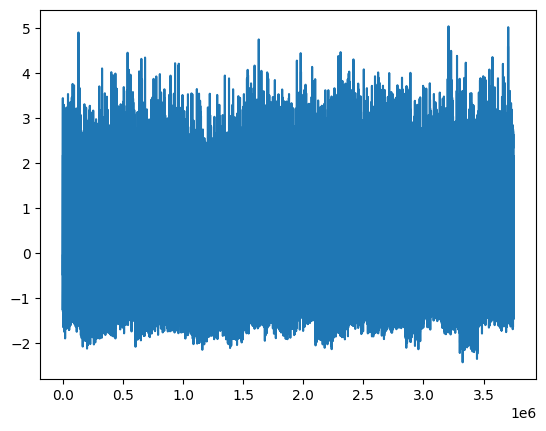

In [6]:
plt.plot(statistics)

In [7]:
import pickle

In [8]:
with open('scanb-statistics.pickle', 'wb') as handle:
    pickle.dump(statistics, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [9]:
with open('scanb-statistics.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [10]:
threshold = np.quantile(statistics, 1-(1/target_arl))

In [11]:
threshold

np.float64(3.798037718941142)

In [12]:
np.sum(detector.stats > threshold) # arl

np.int64(44)

In [13]:
threshold #somewhat lower than the one given in their article's Figure 3 but we also have lower values of the test statistic for Figure 1. Might be due to a slight difference in the median heuristic.

np.float64(3.798037718941142)

In [14]:
target_arls_log = np.arange(3,5.1,.25)

arl2thresh = { i : np.quantile(statistics, 1-(1/10**i)) for i in target_arls_log}

In [15]:
arl2thresh

{np.float64(3.0): np.float64(2.9098579766173),
 np.float64(3.25): np.float64(3.1135286315008117),
 np.float64(3.5): np.float64(3.297909537132657),
 np.float64(3.75): np.float64(3.4823110467052674),
 np.float64(4.0): np.float64(3.6665134537978505),
 np.float64(4.25): np.float64(3.8585001127147533),
 np.float64(4.5): np.float64(4.02032721339876),
 np.float64(4.75): np.float64(4.165443883109609),
 np.float64(5.0): np.float64(4.31077511174428)}